# Making slope graphs by combining charts/geoms in plotnine (aka graphing based on multiple columns)

If your data isn't in a tidy or long format, sometimes things can be a little more difficult when using plotnine. But don't worry, all things are still possible! Let's take a look.

## Steps to a slope graph

Let's say we have some information about school test scores, and how they changed between two years.

In [76]:
import pandas as pd
from plotnine import *

df = pd.DataFrame([
    { 'school_name': 'School A', '2015_score': 84, '2020_score': 99 },
    { 'school_name': 'School B', '2015_score': 64, '2020_score': 89 },
    { 'school_name': 'School C', '2015_score': 87, '2020_score': 78 },
    { 'school_name': 'School D', '2015_score': 95, '2020_score': 98 },
])
df

,school_name,2015_score,2020_score
0,School A,84,99
1,School B,64,89
2,School C,87,78
3,School D,95,98


We *could* reshape (we'll do that down below), but we can learn a little more about ggplot by doing it the long way...

First, **let's plot 2015's scores.**

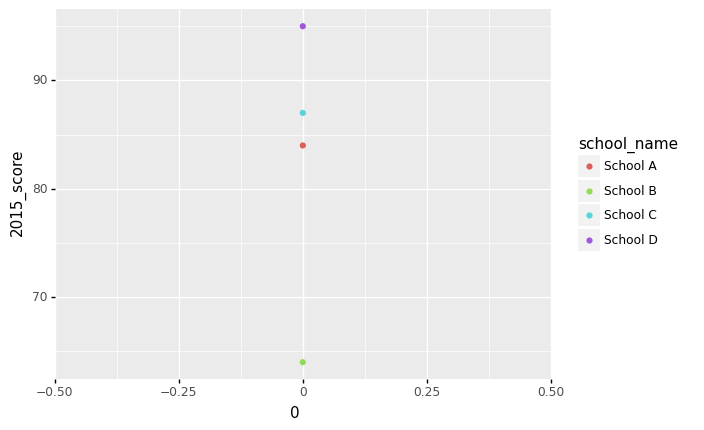

<ggplot: (319714088)>

In [77]:
(
    ggplot(df)
    + aes(y='2015_score', x=0, color='school_name')
    + geom_point()
)

`aes` is smart and realizes that `y='2015_score'` refers to a column, while `x=0` refers to a spot on the graph. While the `y` axis is related to 2015's score, x is *always going to be at zero*.

One thing you think *might* work is to just add in another set of points representing 2020's score. We'll do that by adding another `aes` and another `geom_point()` – we'll make these points be over at `x=10` instead of at `x=0`.

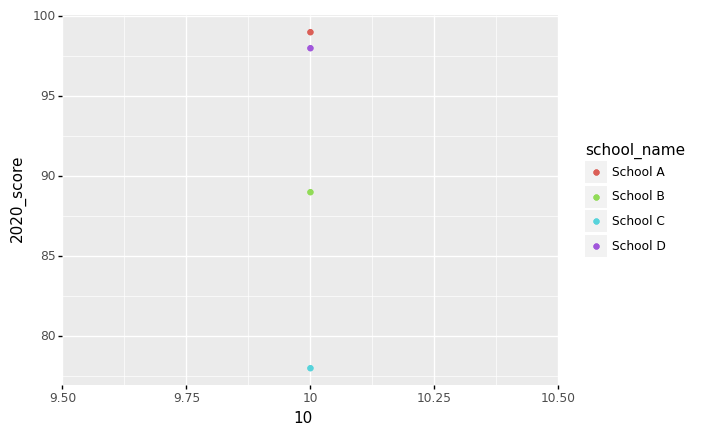

<ggplot: (319763959)>

In [78]:
(
    ggplot(df)
    + aes(y='2015_score', x=0, color='school_name')
    + geom_point()
    + aes(y='2020_score', x=10, color='school_name')
    + geom_point()
)

Unfortunately it only displays the second set of points! To add multiple points to the plotnine chart, we need to get very very specific, and give each `geom_point` its own `aes`. With that tiny change, our points show up in the right spots!

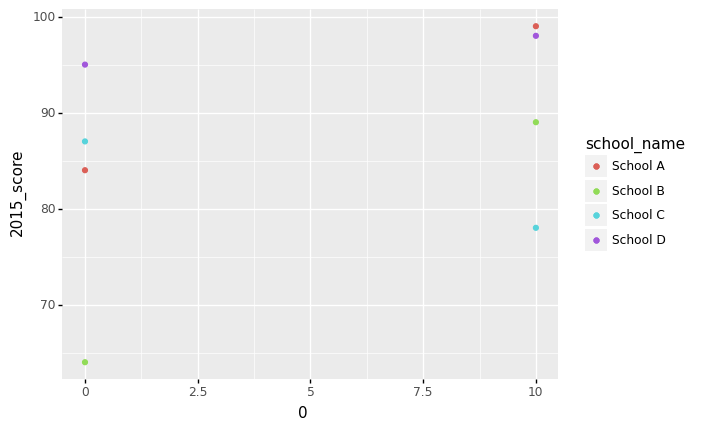

<ggplot: (319503357)>

In [79]:
(
    ggplot(df)
    + geom_point(aes(y='2015_score', x=0, color='school_name'))
    + geom_point(aes(y='2020_score', x=10, color='school_name'))
)

To draw a line between them, we'll use `geom_segment`, which draws a line segment. This segment can take not only an `x` and a `y`, but also an optional `xend` and a `yend` – this makes it draw a point between `(x, y)` and `(xend, yend)`.

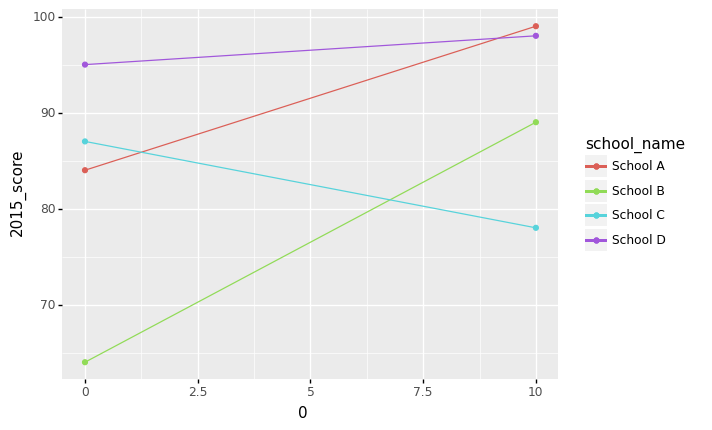

<ggplot: (319461949)>

In [80]:
(
    ggplot(df)
    + geom_point(aes(y='2015_score', x=0, color='school_name'))
    + geom_point(aes(y='2020_score', x=10, color='school_name'))
    + geom_segment(aes(
        x=0,
        y='2015_score',
        xend=10,
        yend='2020_score',
        color='school_name'
    ))
)

Note that if you don't want color, you'll need to use `group='school_name'` instead of `color='school_name'`, otherwise plotnine will try to connect all of the lines together.

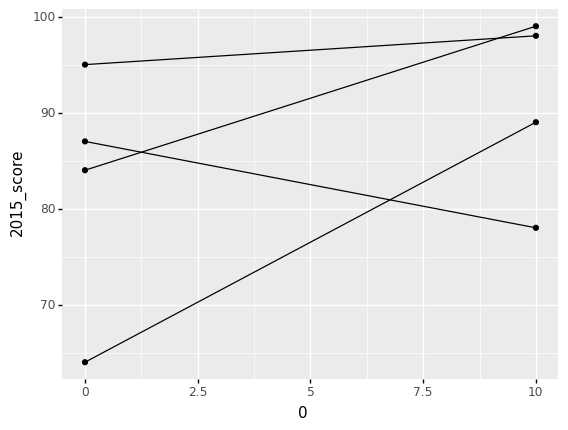

<ggplot: (319899859)>

In [81]:
(
    ggplot(df)
    + geom_point(aes(y='2015_score', x=0))
    + geom_point(aes(y='2020_score', x=10))
    + geom_segment(aes(
        x=0,
        y='2015_score',
        xend=10,
        yend='2020_score',
        group='school_name'
    ))
)

### The reshaped version

To perform the reshaped version, we'll just need to shift from wide to long (or "tidy" data) using `.melt`.

In [86]:
melted = df.melt(id_vars='school_name', value_name='score', var_name='year')
# Clean up the year column into just a number
melted.year = melted.year.str.replace("_score", "").astype(int)
melted.head()

,school_name,year,score
0,School A,2015,84
1,School B,2015,64
2,School C,2015,87
3,School D,2015,95
4,School A,2020,99


Once the data is in long format, now we can just say, "put the year on the x axis and the score on the y axis" and the chart gets built like magic! No more manual fudging with the details of ggplot.

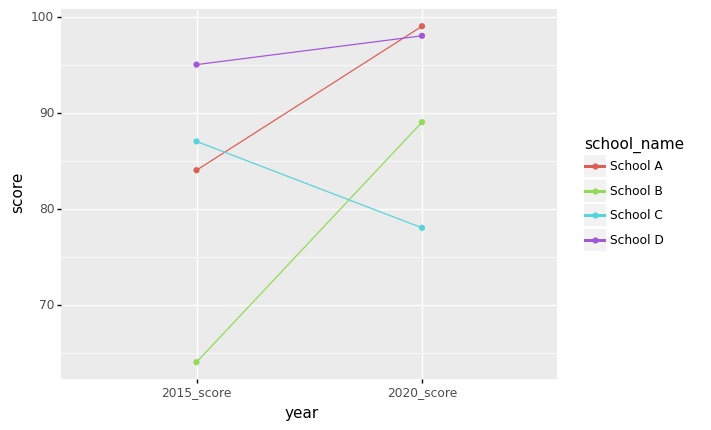

<ggplot: (319982577)>

In [83]:
(
    ggplot(melted)
    + aes(x='year', y='score', group='school_name', color='school_name')
    + geom_point()
    + geom_line()
)